In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [34]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [233]:
pdb_list =['4a2n', '3kp9', '5xpd', '2xov_complete', '5d91', '6e67A']
# pdb_list = ["2xov_complete", "6e67A", "5xpd", "3kp9", "4a2n", "5d91", "2jo1"]

In [308]:
length_info = pd.read_csv("/Users/weilu/Research/server/jun_2019/simluation_hybrid/length_info.csv", index_col=0)
length_info = length_info.sort_values("Length").reset_index()
pdb_list_sorted_by_length = list(length_info.Protein.unique())
length_info_sorted_by_length = list(length_info.Length.unique())
label_list = []
for p, n in zip(pdb_list_sorted_by_length, length_info_sorted_by_length):
    label_list.append(p+f"\n{n}")

In [234]:
simulationType = "simluation_hybrid"
# folder = "original"
folder = "second_small_batch"
all_data = []
for pdb in pdb_list:
    for i in range(3):
        for restart in range(1):
            location = f"/Users/weilu/Research/server/jun_2019/{simulationType}/{folder}/{pdb}/{i}_middle/info.dat"
            try:
                tmp = pd.read_csv(location, sep="\s+")
                tmp = tmp.assign(Run=i, Protein=pdb, Restart=restart)
                all_data.append(tmp)
            except:
                print(pdb, i, restart)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}_middle.csv")


In [235]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_second_small_batch_06-30_middle.csv"
ha = pd.read_csv(fileLocation, index_col=0)



In [236]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_second_small_batch_06-29.csv"
single = pd.read_csv(fileLocation, index_col=0)



In [237]:
combined = pd.concat([single.assign(Frag="single"), ha.assign(Frag="ha")])

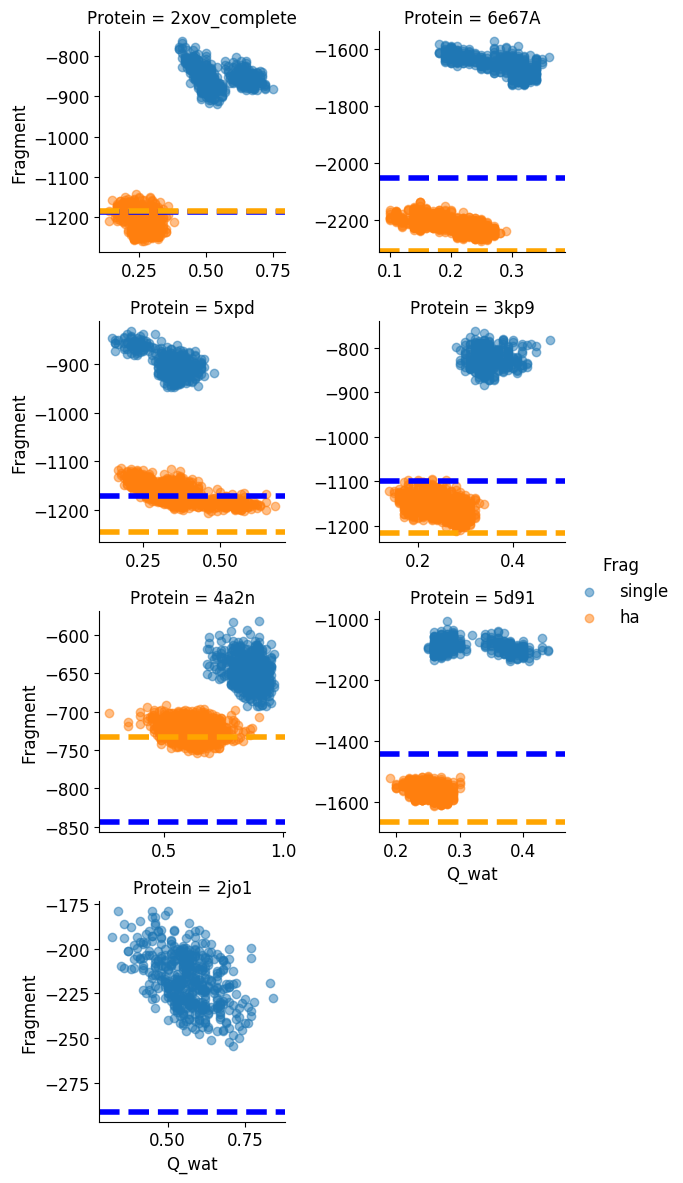

In [272]:
plt.rcParams.update({'font.size': 12})
native_energy = combined.query("Steps < 1 and Run == 0").reset_index(drop=True)
y_show = "Fragment"
g = sns.FacetGrid(combined.query("Steps > 100"), col="Protein",col_wrap=2,  hue="Frag", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Q_wat", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Protein == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    try:
        energy = native_energy.query(f"Protein == '{name}'")[y_show].iloc[1]
        ax.axhline(energy, ls="--", color="orange", linewidth=4)
    except:
        pass

,Steps,Q,Qc,Q_wat,Q_mem,Rg,Pulling,Con,Chain,Chi,...,Fragment,Membrane,Beta,Pap,Rg_Bias,Total,Run,Protein,Restart,Frag
6353,129,0.29,0.48,0.90,0.52,19.35,0.0,522.45,322.50,90.64,...,-706.78,-449.47,-0.35,-82.96,11.78,-1536.91,2,4a2n,0,ha
3291,57,0.15,0.16,0.96,0.21,39.74,0.0,498.15,336.62,113.53,...,-620.50,-452.65,-0.22,-23.10,11.14,-1351.88,1,4a2n,0,single
6867,144,0.26,0.43,0.34,0.59,24.43,0.0,656.88,446.03,124.22,...,-1151.48,-483.78,-18.60,-128.00,5.48,-2265.21,0,3kp9,0,ha
2346,108,0.30,0.48,0.48,0.60,25.75,0.0,598.86,367.77,96.27,...,-782.82,-487.51,-37.65,-152.87,6.34,-2099.24,0,3kp9,0,single
9594,376,0.23,0.37,0.68,0.50,19.20,0.0,526.47,317.59,98.42,...,-1191.96,-678.94,-72.74,-224.21,13.08,-3462.14,2,5xpd,0,ha
1847,107,0.30,0.45,0.48,0.56,24.36,0.0,630.03,420.33,117.86,...,-918.36,-664.41,-30.74,-153.76,9.46,-2696.96,1,5xpd,0,single
9947,230,0.21,0.35,0.38,0.45,35.42,0.0,593.29,427.97,106.83,...,-1210.31,-527.67,-27.09,-132.47,7.79,-2511.35,0,2xov_complete,0,ha
712,217,0.27,0.45,0.75,0.50,31.80,0.0,489.19,313.38,94.38,...,-882.63,-532.75,-65.12,-207.10,11.24,-2691.31,2,2xov_complete,0,single
11789,76,0.15,0.24,0.32,0.27,31.36,0.0,956.30,594.89,173.09,...,-1549.54,-581.33,-39.18,-128.36,15.89,-2976.93,1,5d91,0,ha
4321,91,0.22,0.36,0.44,0.43,24.14,0.0,821.26,533.34,156.16,...,-1084.85,-596.56,-97.76,-150.66,16.28,-2999.37,2,5d91,0,single


In [295]:
max_Q_data

,Steps,Q,Qc,Q_wat,Q_mem,Rg,Pulling,Con,Chain,Chi,...,Fragment,Membrane,Beta,Pap,Rg_Bias,Total,Run,Protein,Restart,Frag
0,129,0.29,0.48,0.90,0.52,19.35,0.0,522.45,322.50,90.64,...,-706.78,-449.47,-0.35,-82.96,11.78,-1536.91,2,4a2n,0,ha
1,57,0.15,0.16,0.96,0.21,39.74,0.0,498.15,336.62,113.53,...,-620.50,-452.65,-0.22,-23.10,11.14,-1351.88,1,4a2n,0,single
2,144,0.26,0.43,0.34,0.59,24.43,0.0,656.88,446.03,124.22,...,-1151.48,-483.78,-18.60,-128.00,5.48,-2265.21,0,3kp9,0,ha
3,108,0.30,0.48,0.48,0.60,25.75,0.0,598.86,367.77,96.27,...,-782.82,-487.51,-37.65,-152.87,6.34,-2099.24,0,3kp9,0,single
4,376,0.23,0.37,0.68,0.50,19.20,0.0,526.47,317.59,98.42,...,-1191.96,-678.94,-72.74,-224.21,13.08,-3462.14,2,5xpd,0,ha
5,107,0.30,0.45,0.48,0.56,24.36,0.0,630.03,420.33,117.86,...,-918.36,-664.41,-30.74,-153.76,9.46,-2696.96,1,5xpd,0,single
6,230,0.21,0.35,0.38,0.45,35.42,0.0,593.29,427.97,106.83,...,-1210.31,-527.67,-27.09,-132.47,7.79,-2511.35,0,2xov_complete,0,ha
7,217,0.27,0.45,0.75,0.50,31.80,0.0,489.19,313.38,94.38,...,-882.63,-532.75,-65.12,-207.10,11.24,-2691.31,2,2xov_complete,0,single
8,76,0.15,0.24,0.32,0.27,31.36,0.0,956.30,594.89,173.09,...,-1549.54,-581.33,-39.18,-128.36,15.89,-2976.93,1,5d91,0,ha
9,91,0.22,0.36,0.44,0.43,24.14,0.0,821.26,533.34,156.16,...,-1084.85,-596.56,-97.76,-150.66,16.28,-2999.37,2,5d91,0,single


In [ ]:
frame = t["Q_wat"].idxmax()

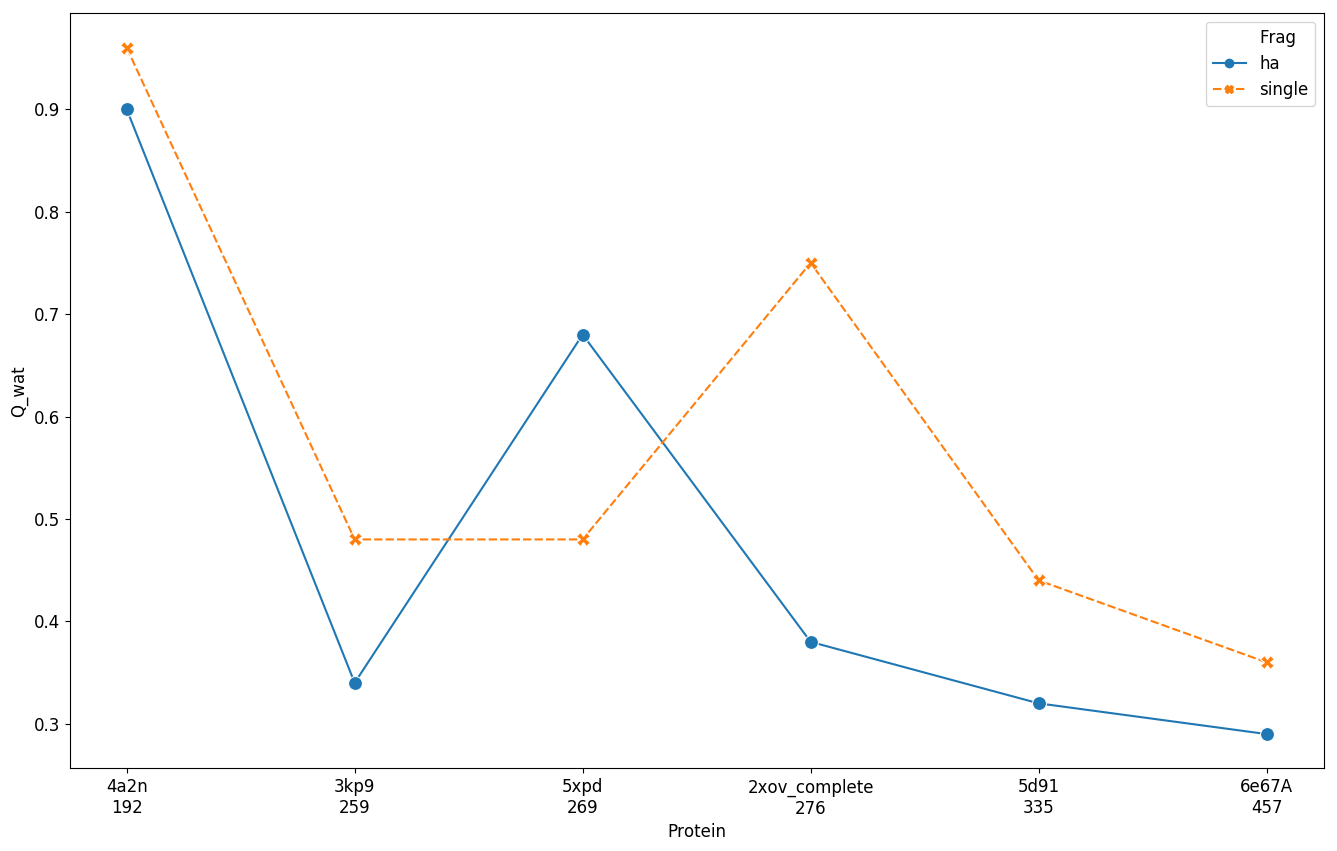

In [294]:
d = combined.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list)
# max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()

t = d.groupby(["Protein", "Frag"])["Q_wat"].idxmax().reset_index()
max_Q_data = d.iloc[t["Q_wat"].to_list()].reset_index(drop=True)

ax = sns.lineplot(x="Protein", y="Q_wat", hue="Frag", style="Frag", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list[1:], rotation=0, ha='center')



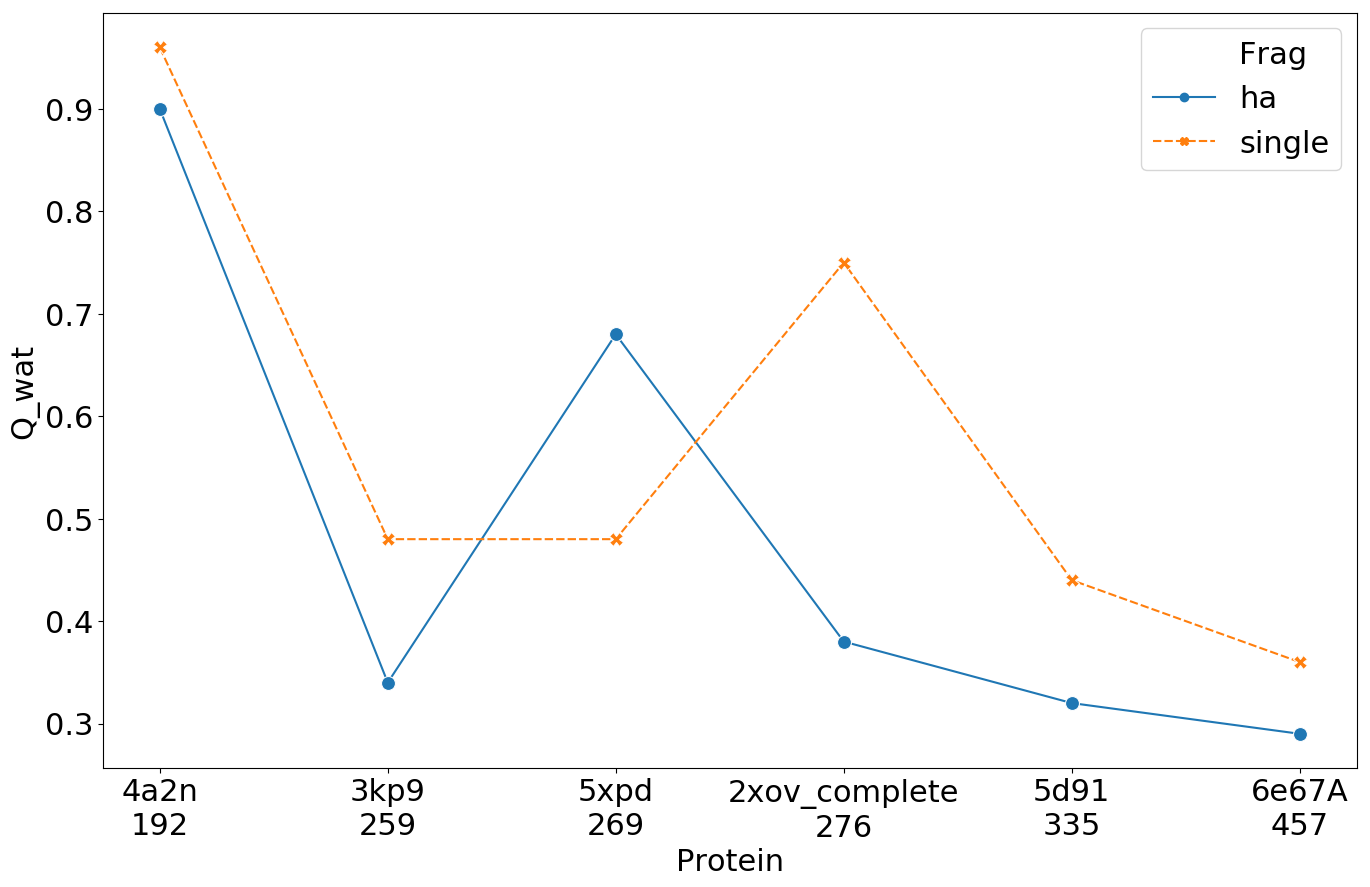

In [241]:
d = combined.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list)
max_Q_data = d.groupby(["Protein", "Frag"])["Q_wat"].max().reset_index()

ax = sns.lineplot(x="Protein", y="Q_wat", hue="Frag", style="Frag", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list[1:], rotation=0, ha='center')



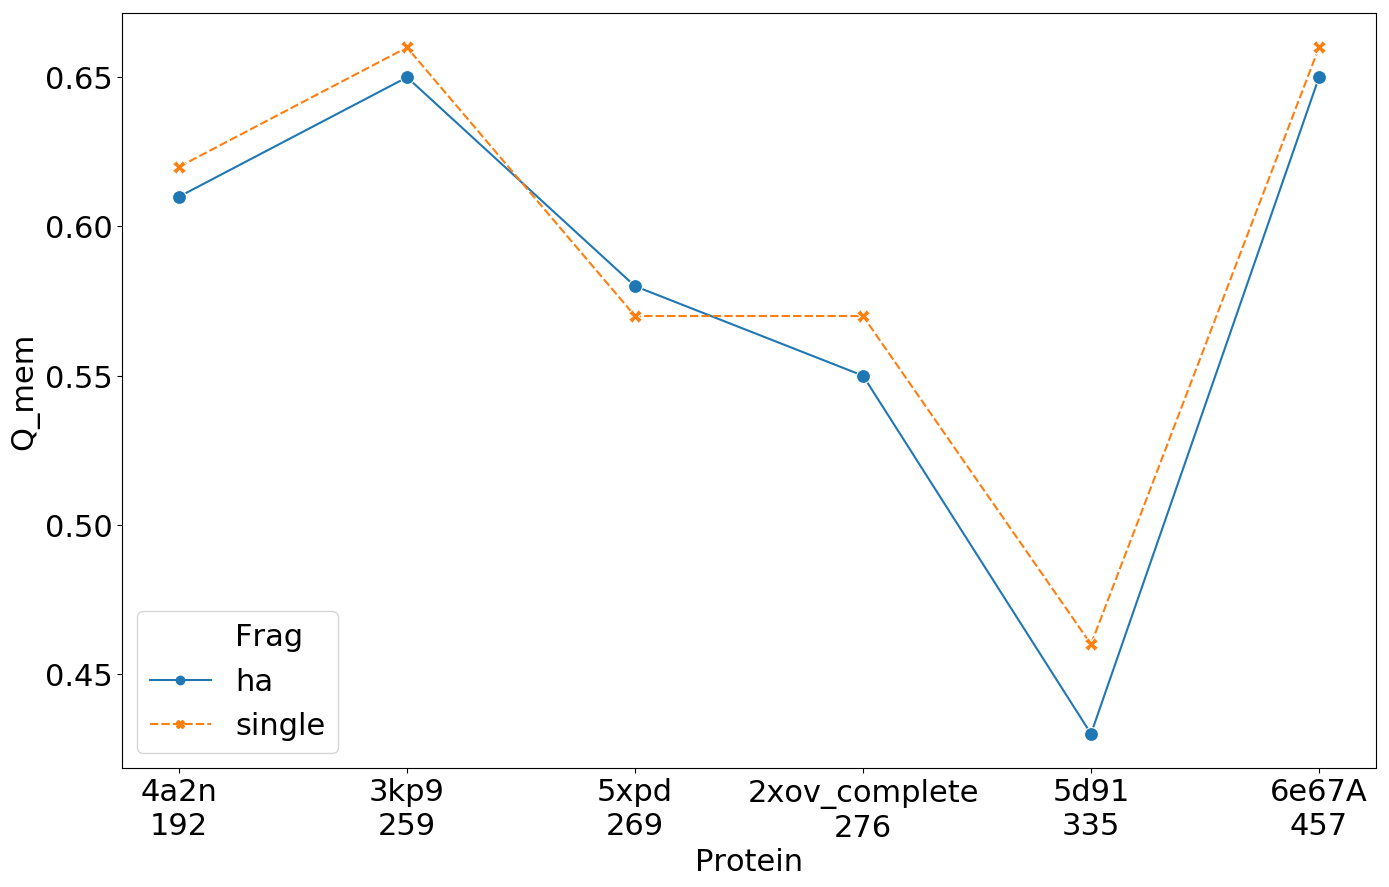

In [242]:
d = combined.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list,
                      ordered=True)
max_Q_data = d.groupby(["Protein", "Frag"])["Q_mem"].max().reset_index()

ax = sns.lineplot(x="Protein", y="Q_mem", hue="Frag", style="Frag", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list[1:], rotation=0, ha='center')



In [160]:
simulationType = "simluation_hybrid"
# folder = "original"
folder = "second_small_batch"
all_data = []
for pdb in pdb_list:
    for i in range(3):
        for restart in range(1):
            location = f"/Users/weilu/Research/server/jun_2019/{simulationType}/{folder}/{pdb}/{i}/info.dat"
            try:
                tmp = pd.read_csv(location, sep="\s+")
                tmp = tmp.assign(Run=i, Protein=pdb, Restart=restart)
                all_data.append(tmp)
            except:
                print(pdb, i, restart)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv")


In [195]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_second_small_batch_06-29.csv"
data = pd.read_csv(fileLocation, index_col=0)



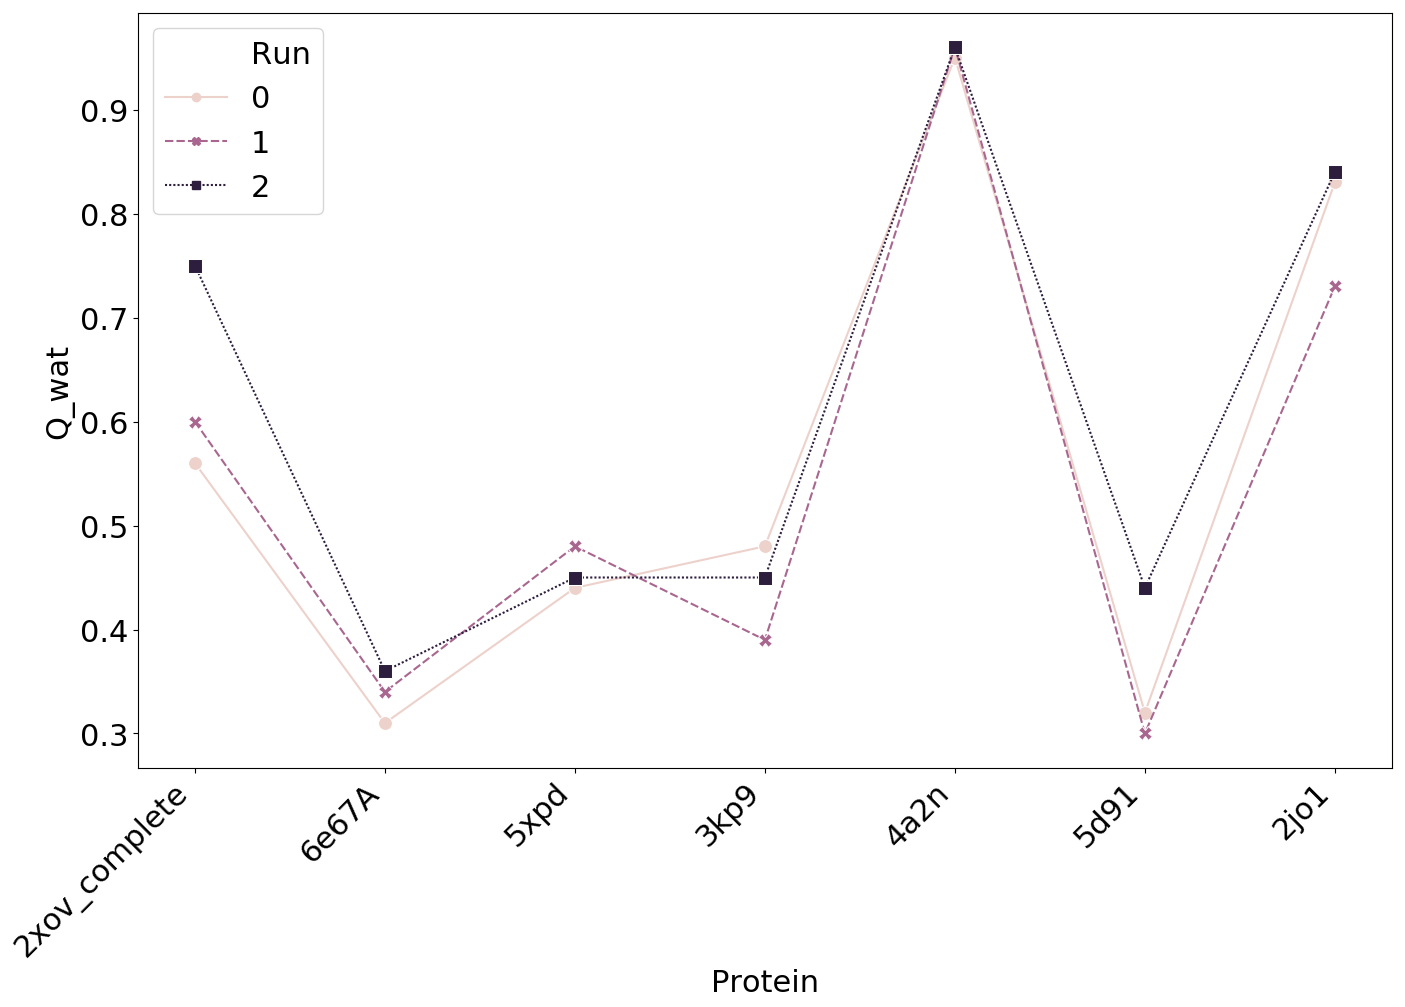

In [162]:
d = data.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list,
                      ordered=True)
max_Q_data = d.groupby(["Protein", "Run"])["Q_wat"].max().reset_index()
ax = sns.lineplot(x="Protein", y="Q_wat", hue="Run", style="Run", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=pdb_list, rotation=45, ha='right')

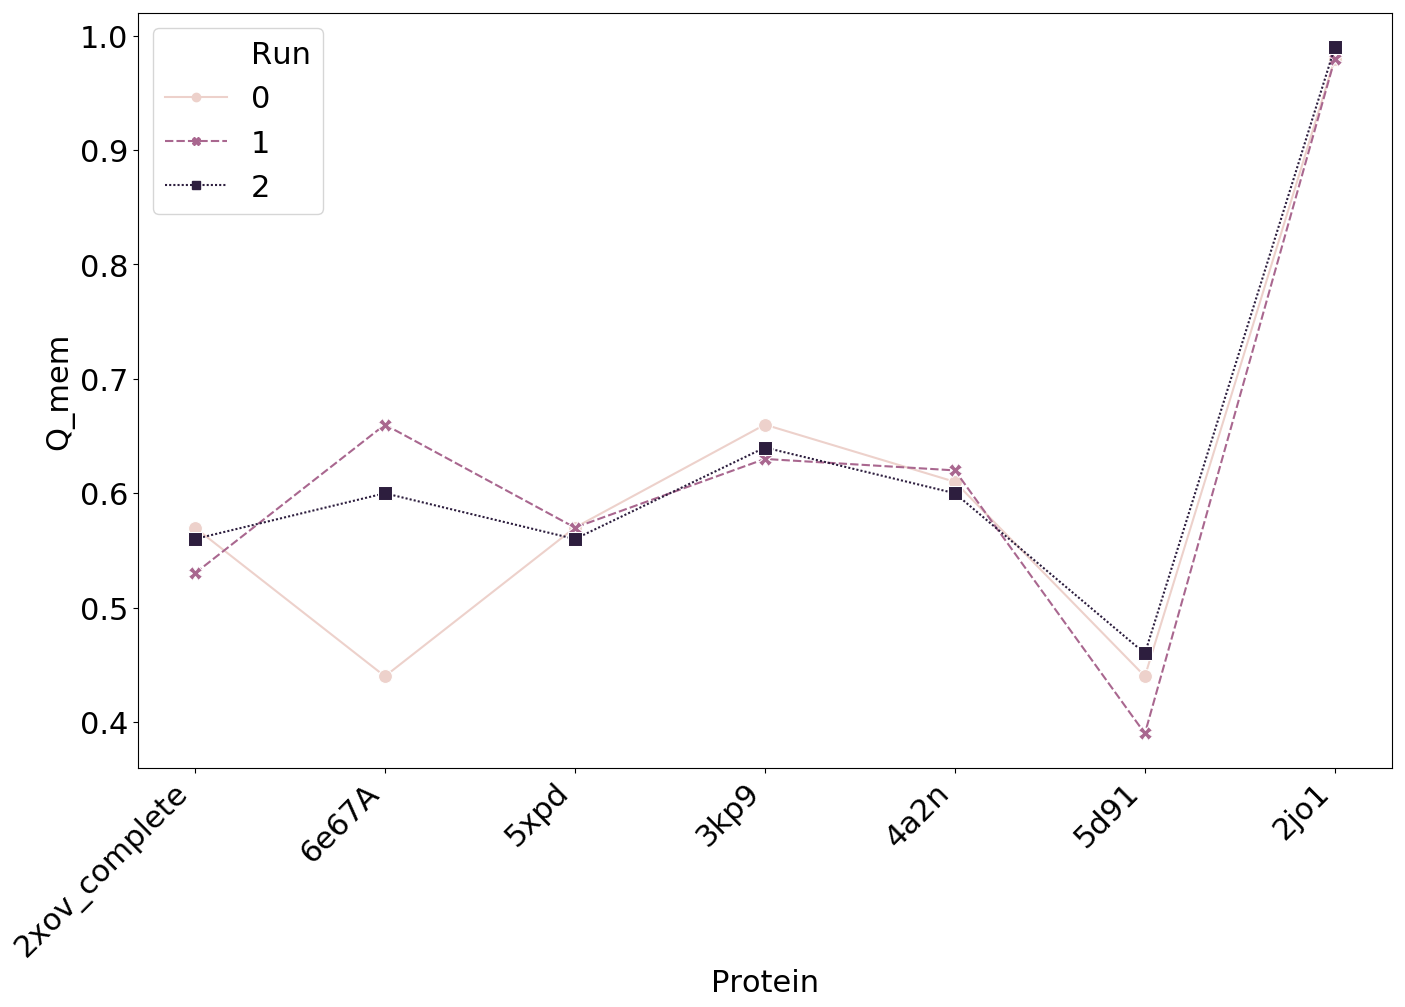

In [163]:
d = data.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list,
                      ordered=True)
max_Q_data = d.groupby(["Protein", "Run"])["Q_mem"].max().reset_index()
ax = sns.lineplot(x="Protein", y="Q_mem", hue="Run", style="Run", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=pdb_list, rotation=45, ha='right')

In [75]:
data = data.merge(length_info, on="Protein")


In [79]:
data = data.sort_values("Length").reset_index(drop=True)

In [96]:
max_Q_data

,Protein,Run,Q_mem
0,2jo1,0,0.98
1,2jo1,1,0.98
2,2jo1,2,0.99
3,4a2n,0,0.61
4,4a2n,1,0.62
5,4a2n,2,0.60
6,3kp9,0,0.66
7,3kp9,1,0.63
8,3kp9,2,0.64
9,5xpd,0,0.57


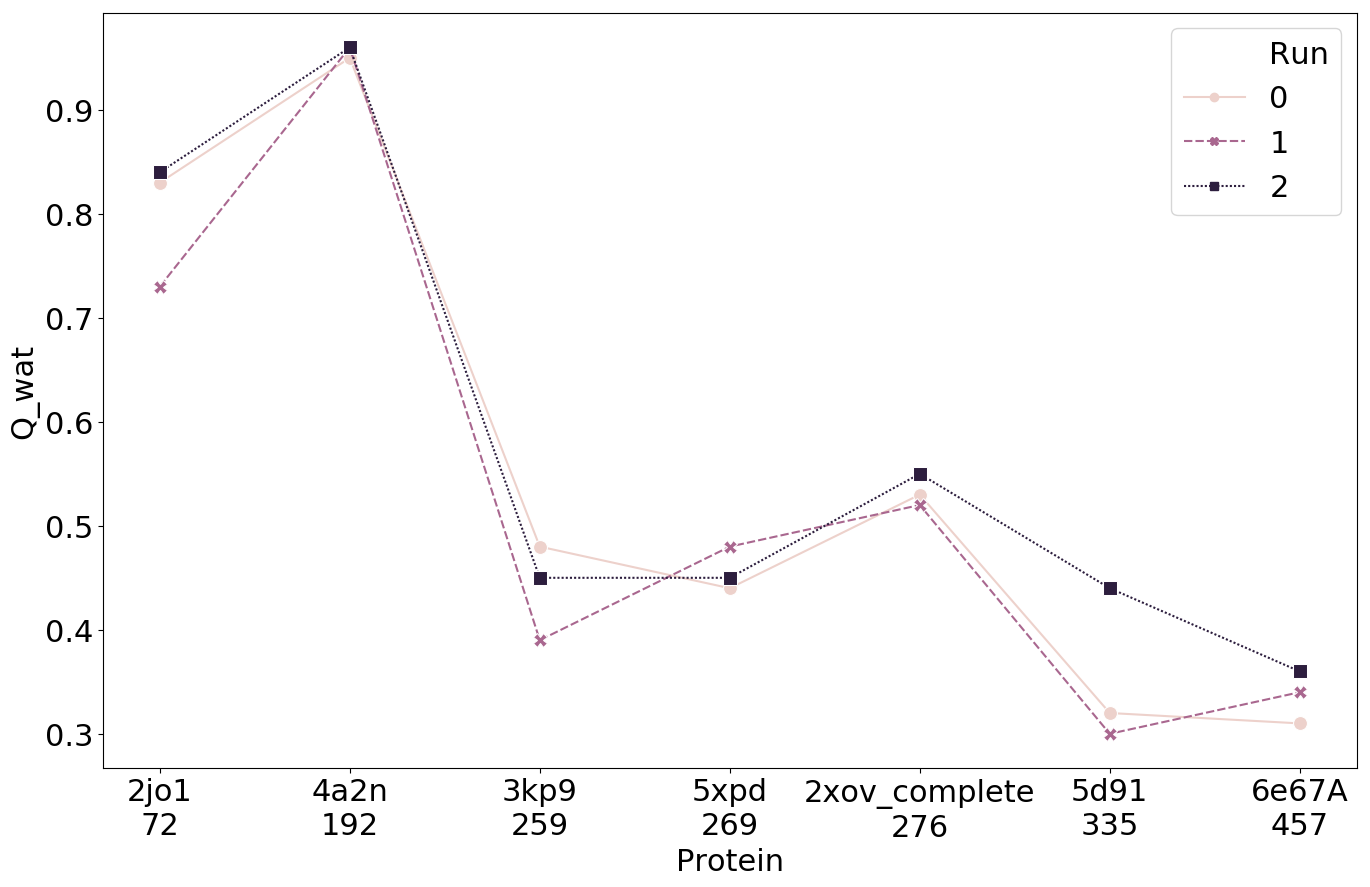

In [109]:
d = data.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list_sorted_by_length,
                      ordered=True)
# max_Q_data = d.groupby(["Protein", "Run"])["Q_wat"].max().reset_index()
max_Q_data = d.sort_values("Q_wat").groupby(["Protein", "Run"]).tail(1).reset_index()
ax = sns.lineplot(x="Protein", y="Q_wat", hue="Run", style="Run", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list, rotation=0, ha='center')




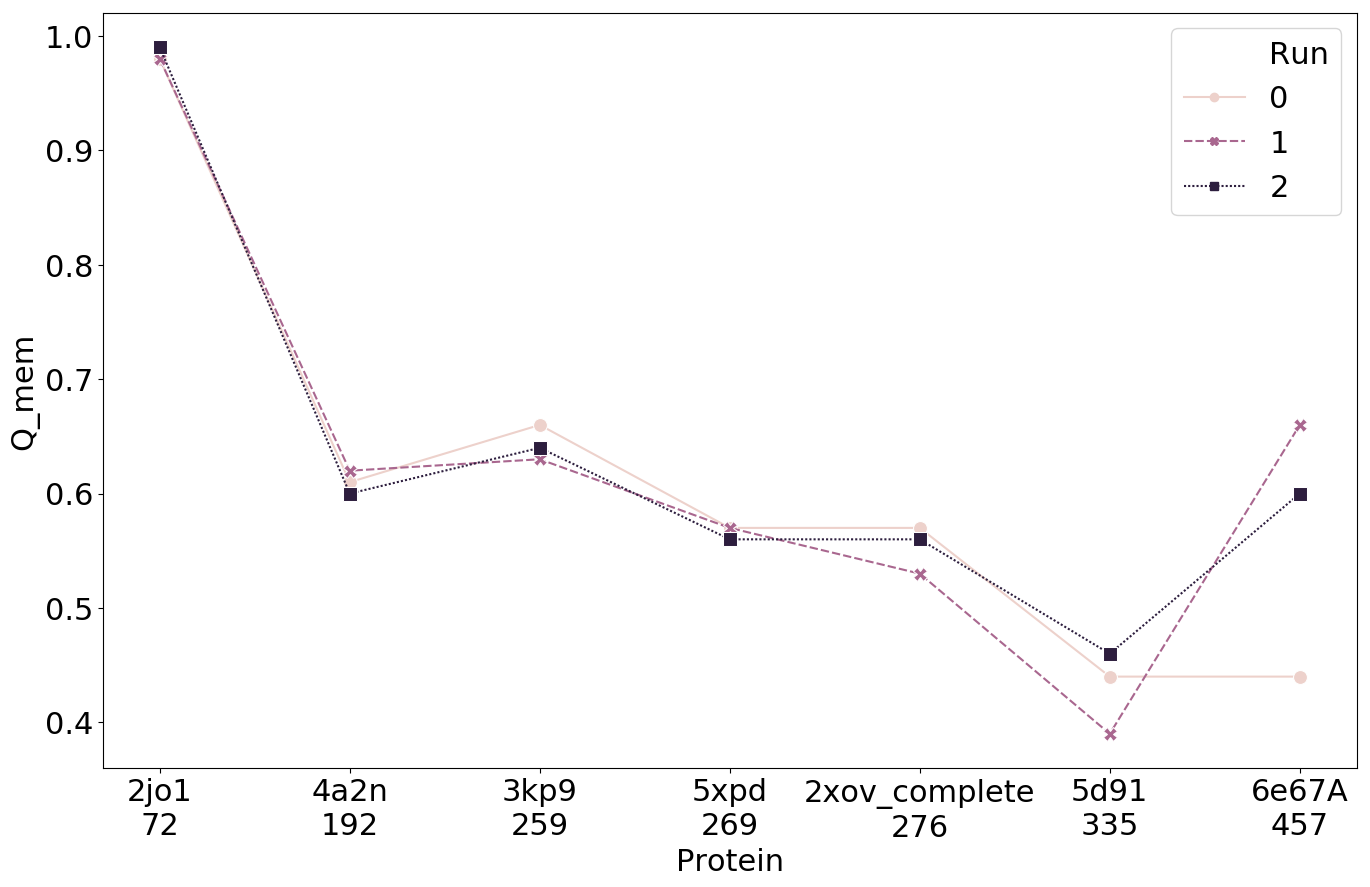

In [92]:
d = data.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list_sorted_by_length,
                      ordered=True)
max_Q_data = d.groupby(["Protein", "Run"])["Q_mem"].max().reset_index()
ax = sns.lineplot(x="Protein", y="Q_mem", hue="Run", style="Run", markers=True, ms=10, data=max_Q_data)
_ = ax.set_xticklabels(labels=label_list, rotation=0, ha='center')




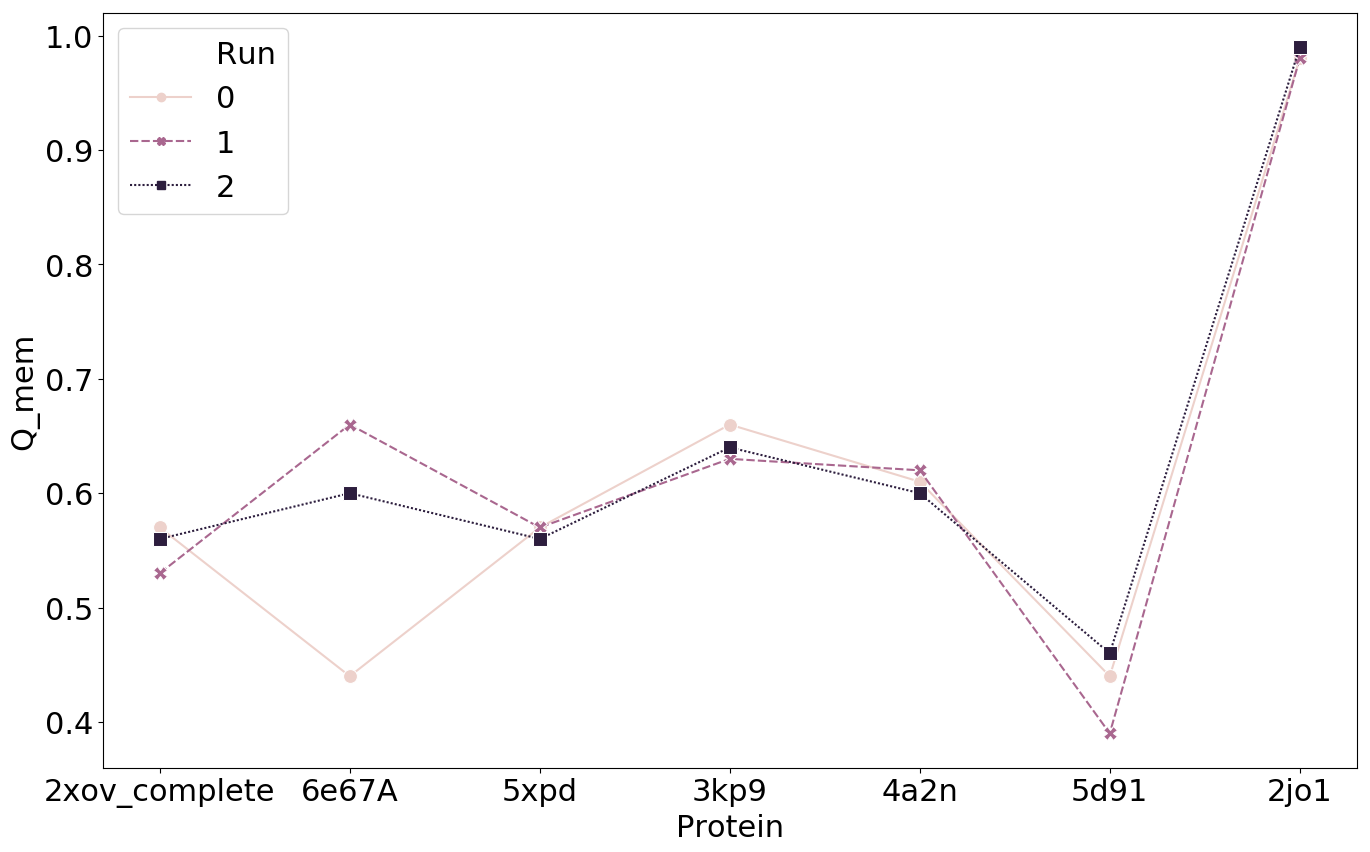

In [57]:
d = data.query("Steps > 2").reset_index(drop=True)
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list,
                      ordered=True)
max_Q_data = d.groupby(["Protein", "Run"])["Q_mem"].max().reset_index()
ax = sns.lineplot(x="Protein", y="Q_mem", hue="Run", style="Run", markers=True, ms=10, data=max_Q_data)
# _ = ax.set_xticklabels(labels=pdb_list, rotation=0, ha='right')

In [24]:
simulationType = "simluation_hybrid"
# folder = "original"
folder = "second_small_batch"
all_data = []
for pdb in pdb_list:
    for i in range(3):
        for restart in range(1):
            location = f"/Users/weilu/Research/server/jun_2019/{simulationType}/{folder}/{pdb}/{i}/frag_ha_energy_{i}.dat"
            try:
                tmp = pd.read_csv(location, sep="\s+")
                tmp = tmp.assign(Run=i, Protein=pdb, Restart=restart)
                all_data.append(tmp)
            except:
                print(pdb, i, restart)
                pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}_HA.csv")


In [27]:
fileLocation = "/Users/weilu/Research/data/openMM/simluation_hybrid_second_small_batch_06-29_HA.csv"
ha = pd.read_csv(fileLocation, index_col=0)



In [29]:
combined = pd.concat([data.assign(Frag="single"), ha.assign(Frag="ha")])

In [47]:
native_energy = combined.query("Steps < 1 and Run == 0").reset_index(drop=True)

In [48]:
native_energy

,Steps,Q,Qc,Q_wat,Q_mem,Rg,Pulling,Con,Chain,Chi,...,Fragment,Membrane,Beta,Pap,Rg_Bias,Total,Run,Protein,Restart,Frag
0,0,1.0,1.0,1.0,1.0,30.76,0.0,1698.54,1772.43,1988.70,...,-1186.18,-358.47,-36.01,-44.31,19.56,3371.37,0,2xov_complete,0,single
1,0,1.0,1.0,1.0,1.0,28.68,0.0,22.97,168.34,19.04,...,-2053.54,-655.75,-21.00,-45.20,22.28,-5666.83,0,6e67A,0,single
2,0,1.0,1.0,1.0,1.0,25.72,0.0,25.98,126.96,18.36,...,-1170.80,-590.19,-26.16,-34.72,15.10,-3415.63,0,5xpd,0,single
3,0,1.0,1.0,1.0,1.0,22.89,0.0,12101.88,721.64,246.38,...,-1100.43,-398.60,-38.63,-28.22,12.56,10335.71,0,3kp9,0,single
4,0,1.0,1.0,1.0,1.0,17.50,0.0,37.87,154.63,38.30,...,-843.77,-306.46,-11.99,-17.16,13.38,-1758.72,0,4a2n,0,single
5,0,1.0,1.0,1.0,1.0,26.31,0.0,38.07,162.54,17.35,...,-1440.86,-347.66,-86.13,-64.94,15.29,-4116.42,0,5d91,0,single
6,0,1.0,1.0,1.0,1.0,21.82,0.0,2.20,12.14,3.11,...,-291.05,-89.77,-0.03,-2.03,1.38,-661.02,0,2jo1,0,single
7,0,1.0,1.0,1.0,1.0,30.76,0.0,1698.54,1772.43,1988.70,...,-1184.56,-358.47,-36.01,-44.31,19.56,3372.99,0,2xov_complete,0,ha
8,0,1.0,1.0,1.0,1.0,28.68,0.0,22.97,168.34,19.04,...,-2309.78,-655.75,-21.00,-45.20,22.28,-5923.07,0,6e67A,0,ha
9,0,1.0,1.0,1.0,1.0,25.72,0.0,25.98,126.96,18.36,...,-1244.57,-590.19,-26.16,-34.72,15.10,-3489.40,0,5xpd,0,ha


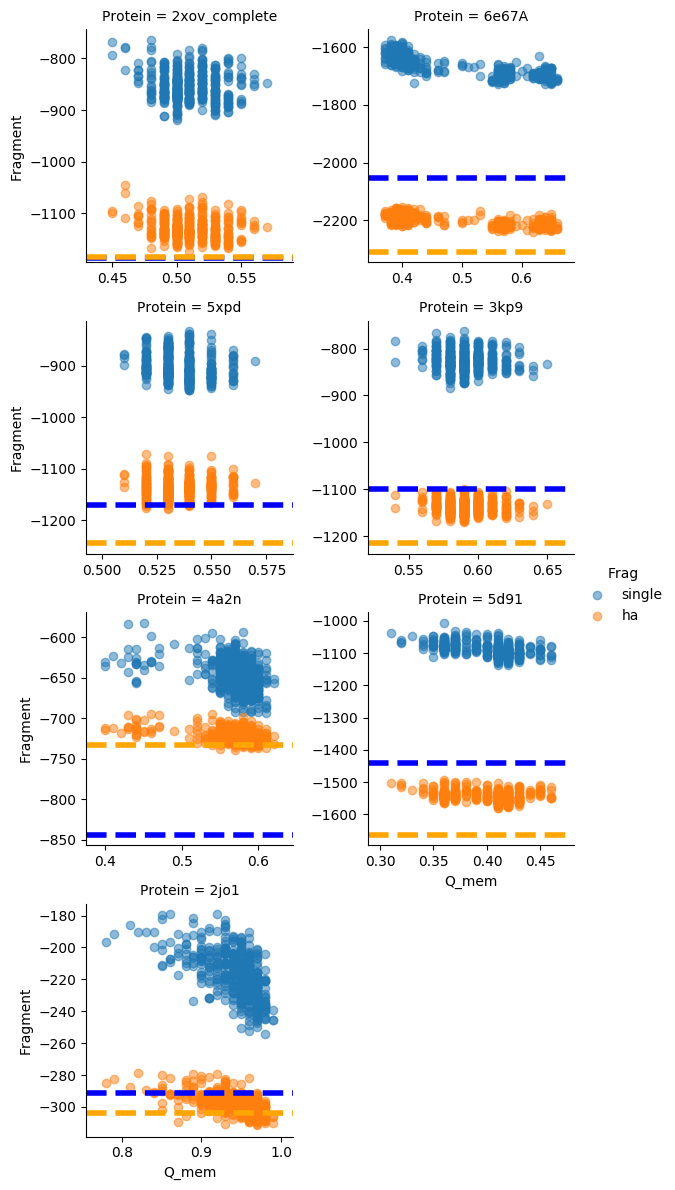

In [49]:
y_show = "Fragment"
g = sns.FacetGrid(combined.query("Steps > 100"), col="Protein",col_wrap=2,  hue="Frag", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Q_mem", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Protein == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    energy = native_energy.query(f"Protein == '{name}'")[y_show].iloc[1]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)
    

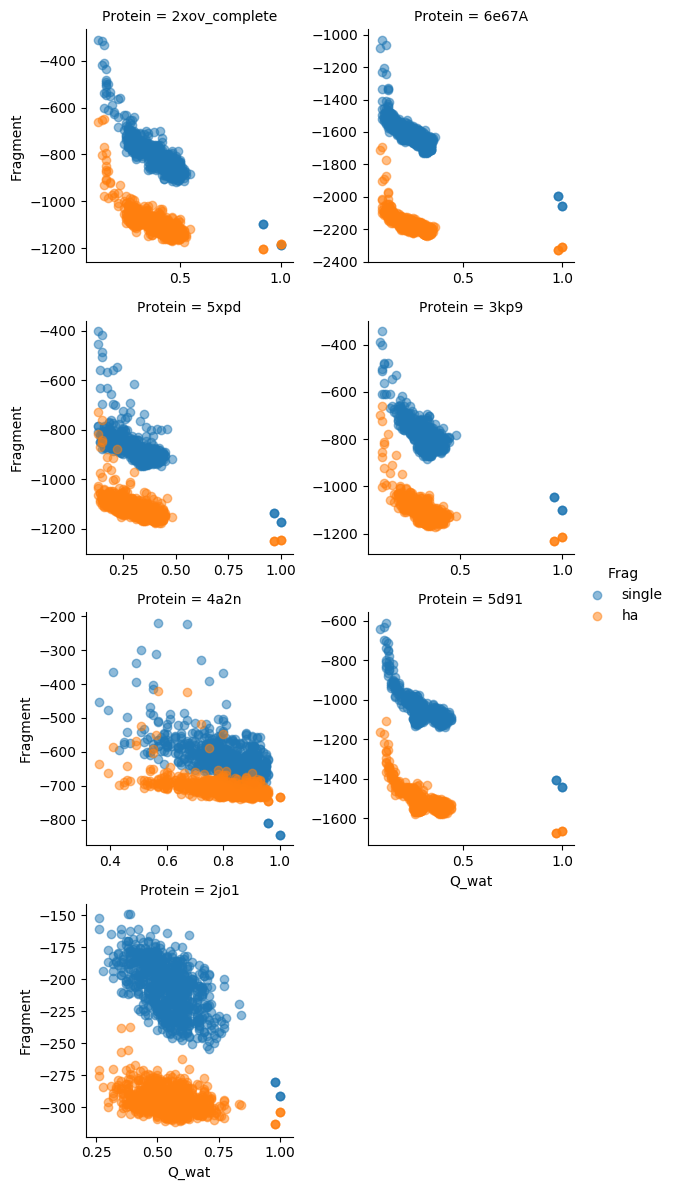

In [37]:
y_show = "Fragment"
g = sns.FacetGrid(combined, col="Protein",col_wrap=2,  hue="Frag", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Q_wat", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
#     ax.axhline(energy, ls="--", color="blue", linewidth=4)
#     energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
#     ax.axhline(energy, ls="--", color="orange", linewidth=4)

In [296]:
infoLocation = "/Users/weilu/Research/server/jun_2019/simluation_hybrid/native/3kp9/info.dat"

In [297]:
info = pd.read_csv(infoLocation, sep="\s+")

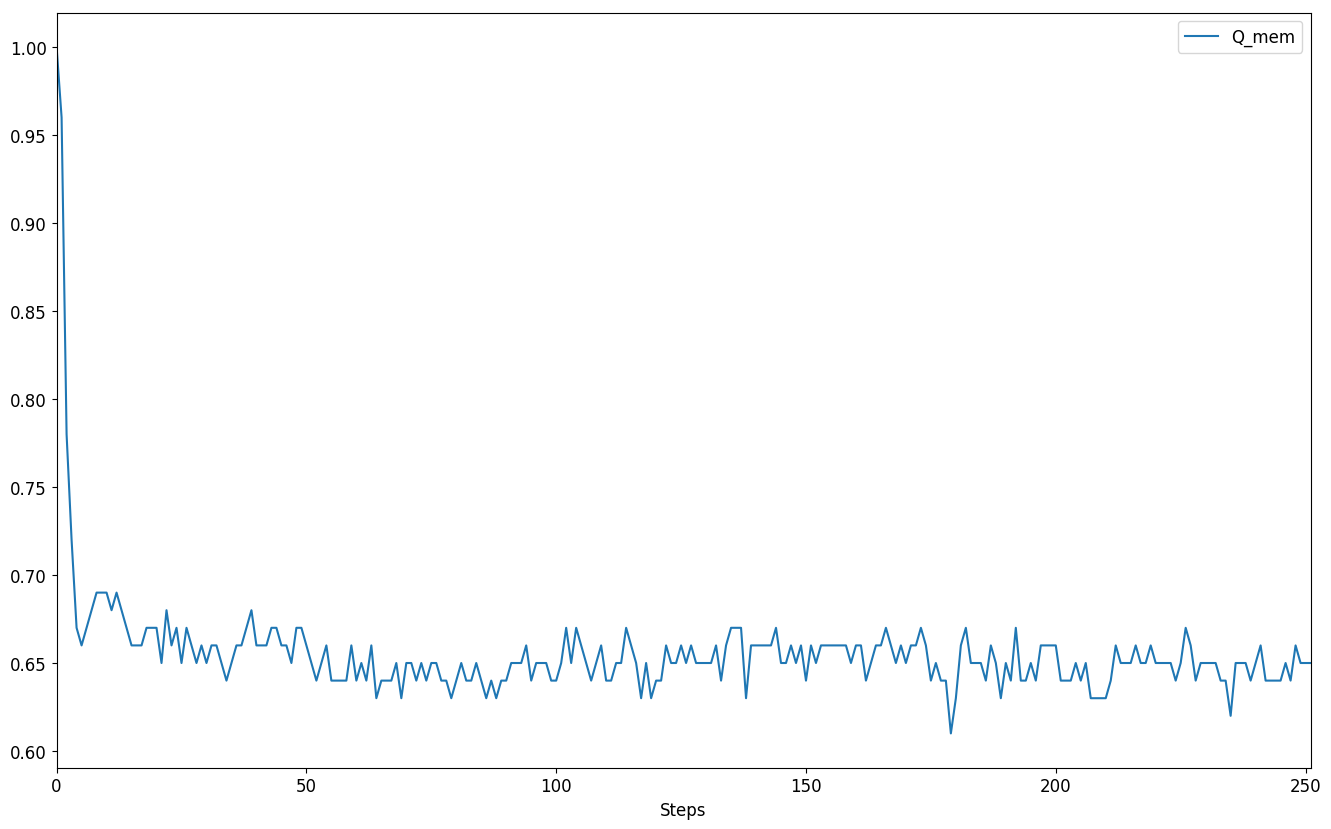

In [302]:
info.plot("Steps", "Q_mem")

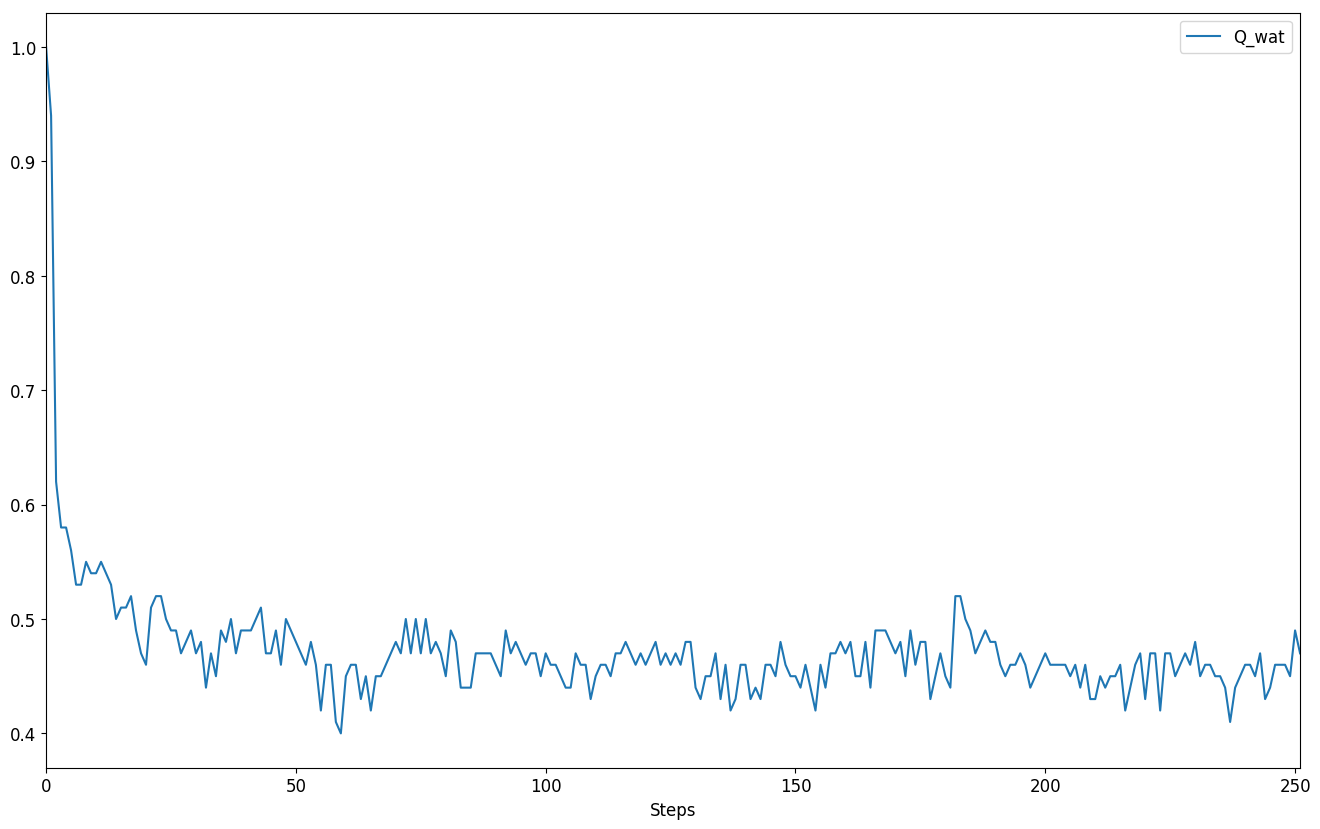

In [303]:
info.plot("Steps", "Q_wat")

In [ ]:
pdb = "2jo1"
info = []
for pdb in pdb_list:
    pdbLocation = f"/Users/weilu/Research/server/jun_2019/simluation_hybrid/setup/{pdb}/{pdb}.pdb"
    parser = PDBParser()
    structure = parser.get_structure('X', pdbLocation)
    n = len(list(structure.get_residues()))
    info.append([pdb, n])
length_info = pd.DataFrame(info, columns=["Protein", "Length"])
length_info.to_csv("/Users/weilu/Research/server/jun_2019/simluation_hybrid/length_info.csv")

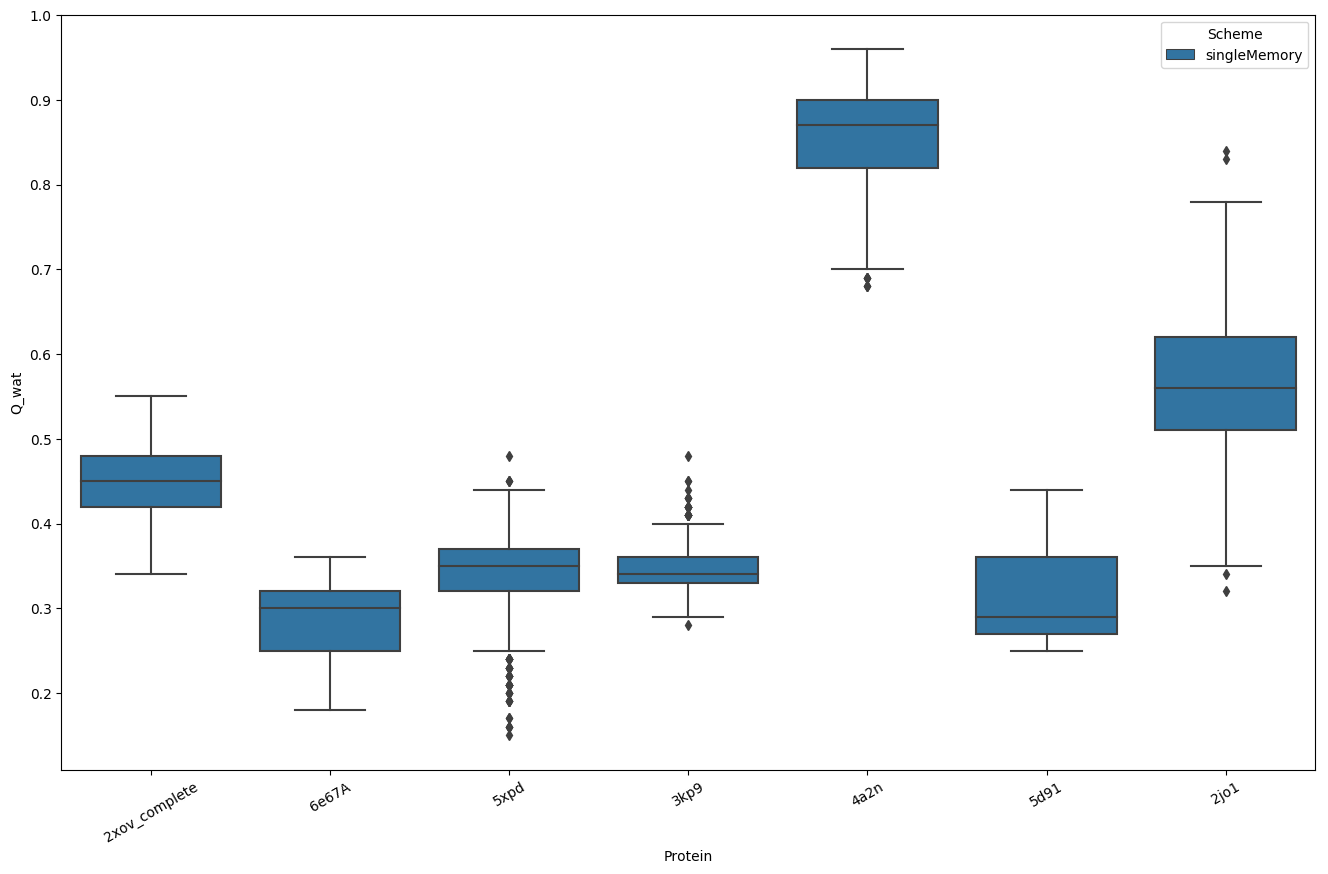

In [14]:
# data1 = pd.read_csv("/Users/weilu/Research/data/openMM/openMM_membrane_structure_prediction_with_pulling_06-18.csv", index_col=0)

# data2 = pd.read_csv("/Users/weilu/Research/data/openMM/openMM_multiLetter_frags_original_06-04.csv", index_col=0)
# data3 = pd.read_csv("/Users/weilu/Research/data/openMM/openMM_multiLetter_jun02_original_06-03.csv", index_col=0)

d = pd.concat([
#     data3.assign(Scheme="original"), 
    data.assign(Scheme="singleMemory").query("Steps > 100"), 

              ])
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list,
                      ordered=True)
max_data = d.groupby(["Protein", "Scheme"])["Qc"].max().reset_index()
# plt.plot
sns.boxplot("Protein", "Q_wat", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)
_ = plt.xticks(rotation=30)

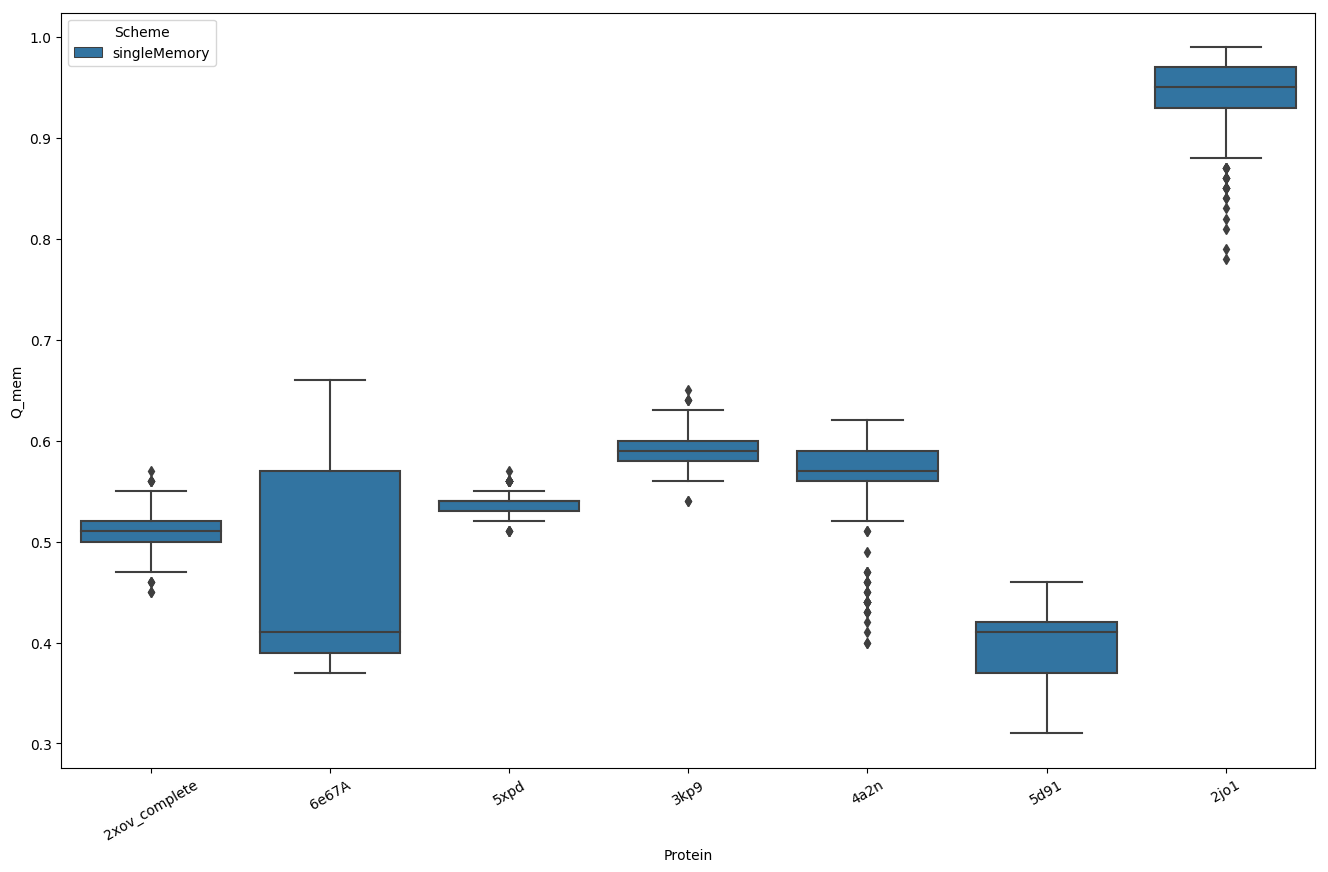

In [13]:
# data1 = pd.read_csv("/Users/weilu/Research/data/openMM/openMM_membrane_structure_prediction_with_pulling_06-18.csv", index_col=0)

# data2 = pd.read_csv("/Users/weilu/Research/data/openMM/openMM_multiLetter_frags_original_06-04.csv", index_col=0)
# data3 = pd.read_csv("/Users/weilu/Research/data/openMM/openMM_multiLetter_jun02_original_06-03.csv", index_col=0)

d = pd.concat([
#     data3.assign(Scheme="original"), 
    data.assign(Scheme="singleMemory").query("Steps > 100"), 

              ])
d.Protein = pd.Categorical(d.Protein, 
                      categories=pdb_list,
                      ordered=True)
max_data = d.groupby(["Protein", "Scheme"])["Qc"].max().reset_index()
# plt.plot
sns.boxplot("Protein", "Q_mem", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)
_ = plt.xticks(rotation=30)

In [134]:
location = "/Users/weilu/Research/server/jun_2019/simluation_hybrid/second_small_batch/2xov_complete/0_longer/info.dat"
t = pd.read_csv(location, sep="\s+")
# skip first two.
t = t.query("Steps > 1").reset_index(drop=True)
frame = t["Q_wat"].idxmax()

# get the position of every model title
model_title_index_list = []
for i in range(n):
    if len(a[i]) >= 5 and a[i][:5] == "MODEL":
        model_title_index = i
        model_title_index_list.append(model_title_index)
model_title_index_list.append(n)
check_array = np.diff(model_title_index_list)
if not np.allclose(check_array, check_array[0]):
    print("!!!! Someting is wrong  !!!!")
else:
    size = check_array[0]
with open(f"max_Q_wat_frame_{frame}.pdb", "w") as out:
    out.write("".join(a[size*frame:size*(frame+1)]))

In [164]:
t["Q_wat"].idxmax()

780

In [138]:
location = "/Users/weilu/Research/server/jun_2019/simluation_hybrid/second_small_batch/2xov_complete/0_longer/movie.pdb"
with open(location) as f:
    a = f.readlines()



In [142]:
n = len(a)

In [143]:
n

1623000

In [153]:
model_title_index_list = np.array(model_title_index_list)

In [ ]:
frame = t["Q_wat"].idxmax()
size*frame:size*(frame+1)

In [ ]:
a[n//1000]

In [ ]:
n = len(a)
for i in range(n-1,-1,-1):
    if len(a[i]) >= 5 and a[i][:5] == "MODEL":
        print(i)
        break


In [123]:
t.iloc[t["Q_wat"].idxmax()]

index        782.00
Steps        782.00
Q              0.24
Qc             0.40
Q_wat          0.54
Q_mem          0.48
Rg            30.21
Pulling        0.00
Con          507.40
Chain        313.64
Chi           97.36
Excluded      47.38
Rama       -1349.35
Contact     -452.83
Helical     -143.64
Fragment   -1247.54
Membrane    -523.86
Beta         -48.27
Pap         -266.99
Rg_Bias       15.38
Total      -3051.31
Name: 779, dtype: float64

In [243]:
a = glob.glob("/Users/weilu/openmmawsem/PDBs/*.pdb")

In [244]:
len(a)

33118

In [264]:
parser = PDBParser(QUIET=True)
for loc in a[:10]:
    # print(loc)
    structure = parser.get_structure('X', loc)
    res_list = list(structure.get_residues())
    n = len(res_list)
    res = res_list[0]
    resId = res.get_id()
    preResidueIndex = resId[1]
    for res in res_list[1:]:
        resId = res.get_id()
        if resId[0] == " ":
            if resId[1] == preResidueIndex + 1:
                pass
            else:
                print("Error?", loc, res.get_full_id(), resId[1], preResidueIndex)
                break
            preResidueIndex = resId[1]

Error? /Users/weilu/openmmawsem/PDBs/1FIT.pdb ('X', 0, 'A', (' ', 83, ' ')) 83 81
Error? /Users/weilu/openmmawsem/PDBs/4Y0C.pdb ('X', 0, 'B', (' ', 105, ' ')) 105 103
Error? /Users/weilu/openmmawsem/PDBs/3WKR.pdb ('X', 0, 'A', (' ', 78, ' ')) 78 60
Error? /Users/weilu/openmmawsem/PDBs/4RU8.pdb ('X', 0, 'B', (' ', 2, ' ')) 2 315
Error? /Users/weilu/openmmawsem/PDBs/2ZDO.pdb ('X', 0, 'B', (' ', 0, ' ')) 0 107
Error? /Users/weilu/openmmawsem/PDBs/2VQC.pdb ('X', 0, 'A', (' ', 11, ' ')) 11 9
Error? /Users/weilu/openmmawsem/PDBs/1O7Q.pdb ('X', 0, 'B', (' ', 82, ' ')) 82 368
Error? /Users/weilu/openmmawsem/PDBs/1DQP.pdb ('X', 0, 'B', (' ', 1, ' ')) 1 230
Error? /Users/weilu/openmmawsem/PDBs/1SQJ.pdb ('X', 0, 'A', (' ', 694, ' ')) 694 684


In [250]:
res = res_list[0]

In [276]:
structure = parser.get_structure('X', "/Users/weilu/openmmawsem/PDBs/1F8E.pdb")
seq = ""
for res in structure.get_residues():
    if res.get_id()[0] == " ":
        seq += three_to_one(res.get_resname())

In [277]:
seq

'RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPDECRFYALSQGTTIRGKHSNGTIHDRSQYRALISWPLSSPPTVYNSRVECIGWSSTSCHDGKTRMSICISGPNNNASAVIWYNRRPVTEINTWARNILRTQESECVCHNGVCPVVFTDGSATGPAETRIYYFKEGKILKWEPLAGTAKHIEECSCYGERAEITCTCRDNWQGSNRPVIRIDPVAMTHTSQYICSPVLTDNPRPNDPTVGKCNDPYPGNNNNGVKGFSYLDGVNTWLGRTISIASRSGYEMLKVPNALTDDKSKPTQGQTIVLNTDWSGYSGSFMDYWAEGECYRACFYVELIRGRPKEDKVWWTSNSIVSMCSSTEFLGQWDWPDGAKIEYFL'

In [279]:
seq[85:95]

'PTVYNSRVEC'

In [280]:
s = "RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPDECRFYALSQGTTIRGKHSNGTIHDRSQYRALISWPLSSPPTVYNSRVECIGWSSTSCHDGKTRMSICISGPNNNASAVIWYNRRPVTEINTWARNILRTQESECVCHNGVCPVVFTDGSATGPAETRIYYFKEGKILKWEPLAGTAKHIEECSCYGERAEITCTCRDNWQGSNRPVIRIDPVAMTHTSQYICSPVLTDNPRPNDPTVGKCNDPYPGNNNNGVKGFSYLDGVNTWLGRTISIASRSGYEMLKVPNALTDDKSKPTQGQTIVLNTDWSGYSGSFMDYWAEGECYRACFYVELIRGRPKEDKVWWTSNSIVSMCSSTEFLGQWDWPDGAKIEYFL"

In [281]:
s[85:95]

'PTVYNSRVEC'